In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [2]:
df = pd.read_csv('akc-data-cleaned_2.csv')

In [3]:
df.head()

,Dog Breed,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_category,shedding_category,energy_level_category,trainability_category,demeanor_category
0,Affenpinscher,22.86,29.21,3.175147,4.535924,12.0,15.0,2-3 Times a Week Brushing,Seasonal,Regular Exercise,Easy Training,Outgoing
1,Afghan Hound,63.50,68.58,22.679619,27.215542,12.0,15.0,Daily Brushing,Infrequent,Energetic,May be Stubborn,Aloof/Wary
2,Airedale Terrier,58.42,58.42,22.679619,31.751466,11.0,14.0,2-3 Times a Week Brushing,Occasional,Regular Exercise,Eager to Please,Friendly
3,Akita,60.96,71.12,31.751466,58.967008,10.0,13.0,Daily Brushing,Seasonal,Energetic,Eager to Please,Alert/Responsive
4,Alaskan Malamute,58.42,63.50,34.019428,38.555351,10.0,14.0,2-3 Times a Week Brushing,Seasonal,Energetic,Independent,Friendly


In [4]:
summary_stats = df.describe()
print(summary_stats)

       min_height  max_height  min_weight  max_weight  min_expectancy  \
count  236.000000  236.000000  236.000000  236.000000      236.000000   
mean    43.328525   51.708911   17.211524   26.410224       11.326271   
std     14.451863   16.156908   11.981277   18.375372        1.851827   
min     12.700000   17.780000    0.000000    0.000000        0.000000   
25%     30.480000   38.100000    7.711070   11.793402       10.000000   
50%     43.180000   53.340000   15.875733   24.947580       12.000000   
75%     55.880000   66.040000   22.679619   34.019428       12.000000   
max     76.200000   81.280000   68.038855  104.326245       15.000000   

       max_expectancy  
count      236.000000  
mean        13.847458  
std          2.069545  
min          0.000000  
25%         13.000000  
50%         14.000000  
75%         15.000000  
max         19.000000  


In [5]:
df['grooming_frequency_category'].value_counts()

grooming_frequency_category
Weekly Brushing              104
Occasional Bath/Brush         61
2-3 Times a Week Brushing     46
Daily Brushing                17
Specialty/Professional         8
Name: count, dtype: int64

In [6]:
df['shedding_category'].value_counts()

shedding_category
Seasonal      111
Occasional     55
Infrequent     36
Regularly      28
Frequent        6
Name: count, dtype: int64

In [7]:
df['energy_level_category'].value_counts()

energy_level_category
Regular Exercise          109
Energetic                  82
Needs Lots of Activity     35
Calm                        9
Couch Potato                1
Name: count, dtype: int64

In [8]:
df['trainability_category'].value_counts()

trainability_category
Agreeable          74
Independent        64
Eager to Please    44
Easy Training      35
May be Stubborn    19
Name: count, dtype: int64

In [9]:
df['demeanor_category'].value_counts()

demeanor_category
Friendly                   74
Reserved with Strangers    72
Alert/Responsive           65
Outgoing                   18
Aloof/Wary                  7
Name: count, dtype: int64

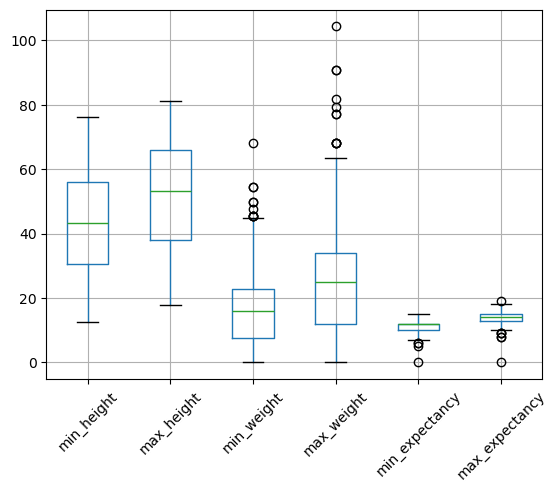

In [10]:
boxplot = df.boxplot(column=['min_height', 'max_height', 'min_weight', 'max_weight', 'min_expectancy', 'max_expectancy'], rot=45)
plt.show()

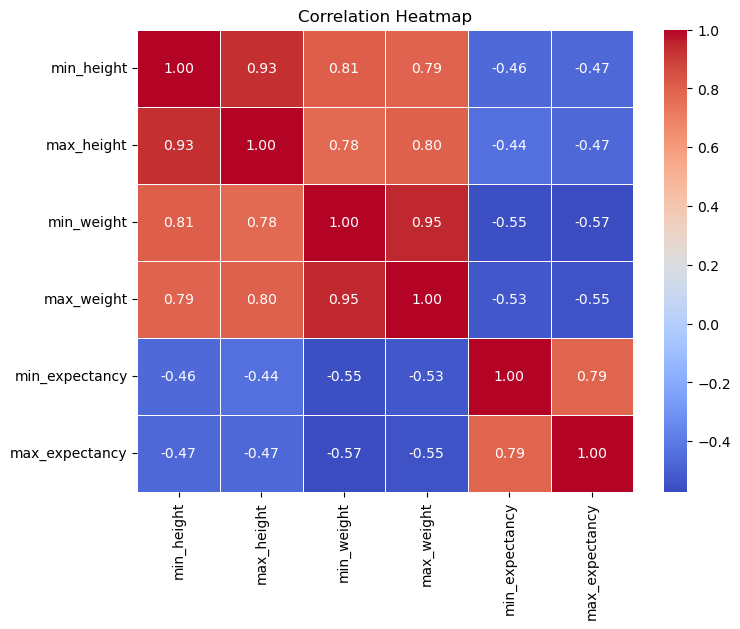

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['min_height', 'max_height', 'min_weight', 'max_weight', 'min_expectancy', 'max_expectancy']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
def chi_squared_test(df, col1, col2):
    """
    Perform a chi-squared test on two categorical columns in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the categorical data.
    col1 (str): The first categorical column.
    col2 (str): The second categorical column.
    
    Returns:
    None: Prints the chi-squared statistic, p-value, degrees of freedom, and expected frequencies.
    """
    # Create a contingency table
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    # Perform the chi-squared test
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Convert expected frequencies to a DataFrame
    expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
    
    # Print results
    print("Contingency Table:")
    print(contingency_table)
    print("\nChi-squared Statistic:", chi2_stat)
    print("P-value:", p_value)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies Table:")
    print(expected_df)
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print(f"There is a significant association between {col1} and {col2}.")
    else:
        print(f"There is no significant association between {col1} and {col2}.")

In [13]:
chi_squared_test(df, 'grooming_frequency_category', 'shedding_category')

Contingency Table:
shedding_category            Frequent  Infrequent  Occasional  Regularly  \
grooming_frequency_category                                                
2-3 Times a Week Brushing           2           6           8          5   
Daily Brushing                      1           5           2          1   
Occasional Bath/Brush               0          11          24          7   
Specialty/Professional              0           7           0          0   
Weekly Brushing                     3           7          21         15   

shedding_category            Seasonal  
grooming_frequency_category            
2-3 Times a Week Brushing          25  
Daily Brushing                      8  
Occasional Bath/Brush              19  
Specialty/Professional              1  
Weekly Brushing                    58  

Chi-squared Statistic: 58.440043840212596
P-value: 9.56453753822561e-07
Degrees of Freedom: 16
Expected Frequencies Table:
shedding_category            Frequent  Infre

In [14]:
chi_squared_test(df, 'trainability_category', 'demeanor_category')

Contingency Table:
demeanor_category      Alert/Responsive  Aloof/Wary  Friendly  Outgoing  \
trainability_category                                                     
Agreeable                            26           0        26         6   
Eager to Please                       8           0        21         5   
Easy Training                        10           0        12         4   
Independent                          18           3        13         2   
May be Stubborn                       3           4         2         1   

demeanor_category      Reserved with Strangers  
trainability_category                           
Agreeable                                   16  
Eager to Please                             10  
Easy Training                                9  
Independent                                 28  
May be Stubborn                              9  

Chi-squared Statistic: 51.199150743718675
P-value: 1.4740161181729631e-05
Degrees of Freedom: 16
Expected Frequ

In [31]:
chi_squared_test(df, 'shedding_category', 'energy_level_category')

Contingency Table:
energy_level_category  Calm  Couch Potato  Energetic  Needs Lots of Activity  \
shedding_category                                                              
Frequent                  0             0          3                       2   
Infrequent                2             0          7                       1   
Occasional                3             1         19                       7   
Regularly                 2             0          8                       7   
Seasonal                  2             0         45                      18   

energy_level_category  Regular Exercise  
shedding_category                        
Frequent                              1  
Infrequent                           26  
Occasional                           25  
Regularly                            11  
Seasonal                             46  

Chi-squared Statistic: 24.81807319266408
P-value: 0.07309749938912785
Degrees of Freedom: 16
Expected Frequencies Table:
ener